In [1]:
# Operating System functionality, especially for traversing directory structures
import os
# Specialized container datatypes, i.e. specialized versions of lists, dictionaries, etc.
import collections as coll
# Date and time functions, useful for timestamping file names of figures.
import datetime
# Functional programming tools.
import itertools as itt
# Pretty-printing text by wrapping and filling lines.
import textwrap as tw

# Well-known package for n-dimensional arrays, numerical functions, linear algebra, etc.
import numpy as np
# Data analysis package.
import pandas as pd
# "Default" plotting package of Python.
import matplotlib as mpl
import matplotlib.pyplot as plt
# Matplotlib colours module.
import matplotlib.colors as mpcol
# Package improving Matplotlib's default plot style.
import seaborn as sns

import pickle

# Single Cell Analysis in Python
import scanpy as sc
import anndata as ad

//anaconda3/envs/robin_simulations/lib/python3.7/site-packages/anndata/_core/anndata.py:21: FutureWarning: pandas.core.index is deprecated and will be removed in a future version.  The public classes are available in the top-level namespace.
  from pandas.core.index import RangeIndex
//anaconda3/envs/robin_simulations/lib/python3.7/site-packages/dask/config.py:161: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}


# Reading in data

# final regulons, final filtered UMAP from Stefan

In [2]:
#py_auc_fname = 'D:Robin/pyscenic/final_nuclei/full_auc_mtx.p' #all cells
py_auc_fname = 'D:Robin/pyscenic/final_nuclei/subcluster_auc_mtx.p' #only excitatory neurons
auc_mtx = pickle.load(open(py_auc_fname,'rb'))

In [17]:
#single cell data - this will allow you to look at individual genes

#fname = 'D:Robin/Single_seq_data/final_nuclei/full.loom' #all cells
fname = 'D:Robin/Single_seq_data/final_nuclei/subcluster.loom' #only excitatory neurons

sc_ad = ad.read_loom(fname,sparse=False)
sc.pp.scale(sc_ad)
sc_mtx = pd.DataFrame(sc_ad.X,index=sc_ad.obs.index,columns=sc_ad.var.index)

Variable names are not unique. To make them unique, call `.var_names_make_unique`.


### regulon matrices from pyscenic

# Clustering

In [7]:
%run scanpy_aid.py

In [8]:
data = sc.AnnData(auc_mtx)

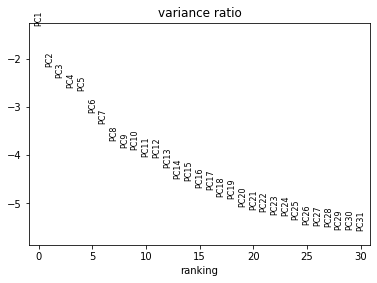

In [9]:
sc.tl.pca(data, svd_solver='arpack', n_comps=40)
sc.pl.pca_variance_ratio(data, log=True, save=True)


//anaconda3/envs/robin_simulations/lib/python3.7/site-packages/umap/spectral.py:4: NumbaDeprecationWarning: No direct replacement for 'numba.targets' available. Visit https://gitter.im/numba/numba-dev to request help. Thanks!
  import numba.targets


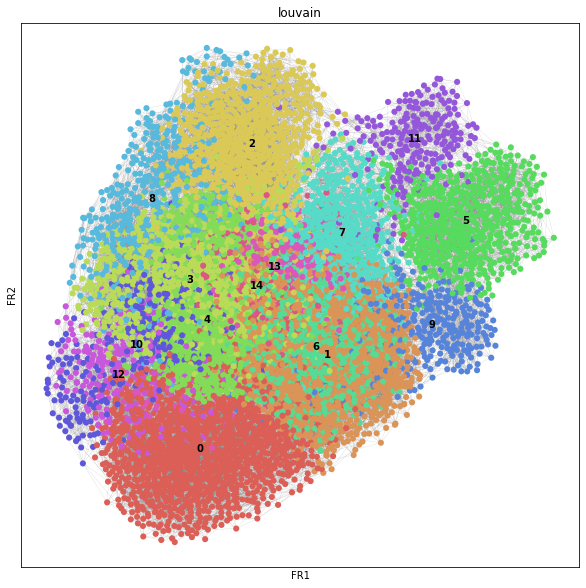

In [10]:
pcs_used, nbs, seed = 30, 10, 6
data, fig, ax = calc_and_plot_graph(data, pcs_used, nbs, seed);
#fig.savefig(os.path.join(OUT_FOLDER,'pca_clustering.png'))

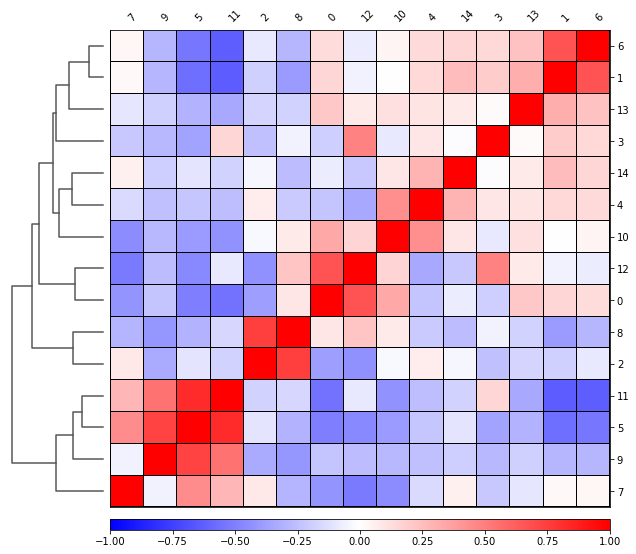

In [11]:
ax = sc.pl.correlation_matrix(data, 'louvain') 

In [12]:
sc.tl.umap(data)

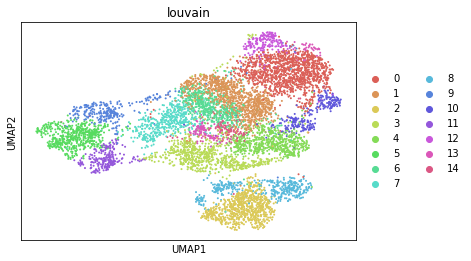

In [13]:
sc.pl.umap(data, color="louvain")

### looking at expression of regulons

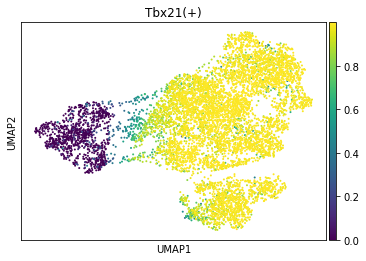

In [14]:
sc.pl.umap(data, color = 'Tbx21(+)')

### looking at expression of individual genes

In [15]:
def indiv_gene_umap(auc_ad, ex_mtx, gene_list, columns=3):
    compressed_list = [gene for gene in gene_list if gene in ex_mtx.columns]
    no_list = [gene for gene in gene_list if gene not in ex_mtx.columns]
    if len(no_list) > 0:
        print('Not sequenced: ',no_list)
    for gene in compressed_list:
        auc_ad.obs[gene] = ex_mtx[gene]
        
    sc.pl.umap(auc_ad,color=compressed_list)

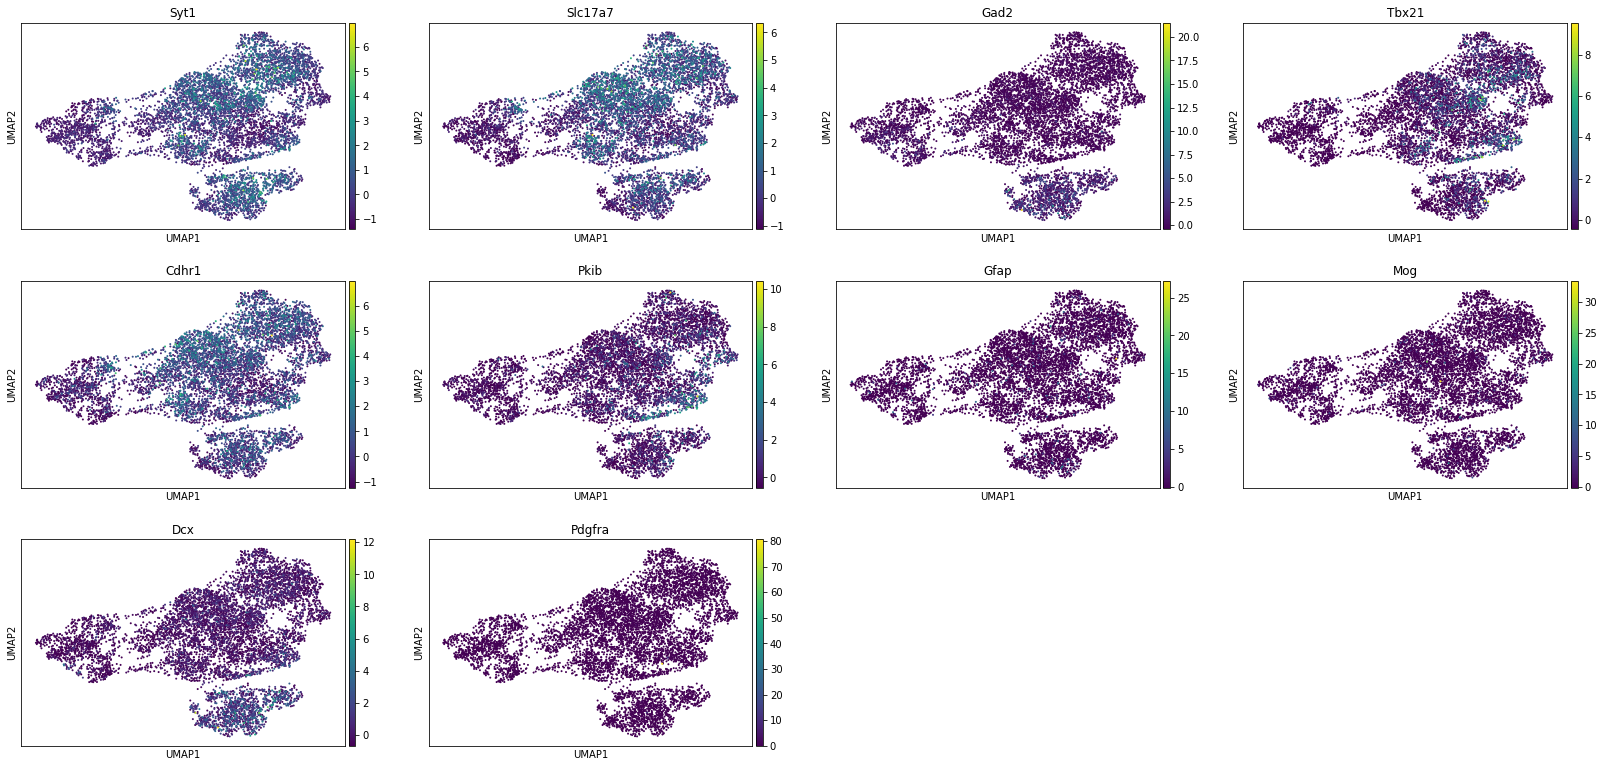

In [18]:
#Looking at general markers for checking
indiv_gene_umap(data, sc_mtx,
    ['Syt1', 'Slc17a7', 'Gad2',  'Tbx21',  'Cdhr1',  'Pkib', 'Gfap',  'Mog',  'Dcx', 'Pdgfra'])

In [ ]:
#OPTIONAL
#Looking at specific markers from OB review
indiv_gene_umap(data, sc_mtx, 
    ['Slc17a6', 'Slc17a8', 'Calb1', 'Calb2', 'Slc17a7', 'Cck', 'Avp', 'Th' ], columns=3)

In [ ]:
#OPTIONAL
#Looking at markers from previous analysis
indiv_gene_umap(data, sc_mtx,
                ['Pip5k1b', 'Trp73', 'Ebf3', 'Nrp2', 'Cntn6', 'Kcnmb2', 'Cadps2', 'Satb1', 'Coch'], columns=3)

In [ ]:
#Looking at highly specific cluster markers from heatmap (the best ones)
indiv_gene_umap(data, sc_mtx,
    ['Siah3', 'Itga8', 'Ly6g6e', 'Ebf3', 'Trp73', 'Lhx1', 'Rorb', 'Coch', 'Chst9', 'Sgcg', 'Vdr', 'Olfr112', 'Barhl2' 'Adgrl2', 'Doc2b', 'Cntn6', 'Shox2', 'Samsn1' 'Ros1', 'Nts', 'Vgll2', 'Piezo2' 'Cadps2', 'Calca', 'Ednra', 'Cdkn1c', 'Ets1', ], columns=3)

In [ ]:
#OPTIONAL
#Looking at cluster M1 
indiv_gene_umap(data, sc_mtx, 
    ['Far2', 'Miat', 'Apba2', 'Samsn1', 'Trdn', 'Ros1', 'Zfp114', 'Hey2' ], columns=3)

In [ ]:
#OPTIONAL
#Looking at cluster M2
indiv_gene_umap(data, sc_mtx, 
    ['Ptprr', 'Adgrl2', 'C1ql1', 'Thrb', 'Sertm1', 'Pde1a', 'Kcng1', 'Tshz3', 'Doc2b', 'Foxp2', 'Vcan', 'Col23a1', 'Cntn6', 'Ebf1'], columns=3)

In [ ]:
#OPTIONAL
#Looking at cluster M3
indiv_gene_umap(data, sc_mtx,
    ['Ednra', 'Ets1', 'Nts', 'Cbln2', 'Plekha7', 'Cadps2', 'Fst'], columns=3)

In [ ]:
#OPTIONAL
# Looking at GLUTAMATE RECEPTORS 
indiv_gene_umap(data, sc_mtx,
    ['Grin1', 'Grin2a', 'Grin2b', 'Grin2c', 'Grin2d', 'Grin3a', 'Grin3b' 'Gria1', 'Gria2', 'Gria4', 'Grik1', 'Grik3', 'Grik5', 'Grm4', 'Grm5', 'Grm8' ], columns=2)

In [ ]:
#OPTIONAL
#Looking ad adhesion molecules
indiv_gene_umap(data, sc_mtx, 
    ['Ncam2', 'Ncam1', 'Nmdar','Nrcam', 'Plexina3', 'L1', 'Chl1', 'Ncam140', 'Ncam180', 'Ncam120' ], columns=3)

In [ ]:
#OPTIONAL
# Looking at CALCIUM CHANNELS 
indiv_gene_umap(data, sc_mtx,
    ['Cacna1s', 'Cacna1e', 'Cacna1f', 'Cacna1a', 'Cacna1b', 'Cacna1e', 'Cacna1g', 'Cacna1h', 'Cacna1i'], columns=2)

# Replacing cluster names (depending on number of clusters, you may need to add rows)

In [35]:
data.obs['louvain'] = data.obs.louvain.replace({
    '0':'name_0',
    '1':'name_1',
    '2':'name_2',
    '3':'name_3',
    '4':'name_4',
    '5':'name_5',
    '6':'name_6',
    '7':'name_7',
    '8':'name_8',
    '9':'name_9'
})

### Table for Sharing Clusters

In [23]:
CLUSTER_TABLE_FNAME = 'D:Robin/pyscenic/final_nuclei/full_pyscenic_ids.p'

umap0 = []
umap1 = []
for i in data.obsm['X_umap']:
    umap0.append(i[0])
    umap1.append(i[1])
table_data = {'UMAP_1': umap0, 'UMAP_2': umap1, 'py_cluster': data.obs['louvain'].to_list()}
py_ids = pd.DataFrame(table_data)
py_ids.index = data.obs.index
py_ids.to_pickle(CLUSTER_TABLE_FNAME)